In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as st
from collections import deque
from google.colab.patches import cv2_imshow

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

In [ ]:
imagepaths = []

for dirname, _, filenames in os.walk(r"/content/drive/My Drive/Colab Notebooks/pothole_dataset"):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))
print(imagepaths)

2523
['/content/drive/My Drive/Colab Notebooks/pothole_dataset/unpaved_road/UnPavedRoad__1281.jpg', '/content/drive/My Drive/Colab Notebooks/pothole_dataset/unpaved_road/UnPavedRoad__1275.jpg', '/content/drive/My Drive/Colab Notebooks/pothole_dataset/unpaved_road/UnPavedRoad__1284.jpg', '/content/drive/My Drive/Colab Notebooks/pothole_dataset/unpaved_road/UnPavedRoad__1276.jpg', '/content/drive/My Drive/Colab Notebooks/pothole_dataset/unpaved_road/UnPavedRoad__1283.jpg', '/content/drive/My Drive/Colab Notebooks/pothole_dataset/unpaved_road/UnPavedRoad__1279.jpg', '/content/drive/My Drive/Colab Notebooks/pothole_dataset/unpaved_road/UnPavedRoad__128.jpg', '/content/drive/My Drive/Colab Notebooks/pothole_dataset/unpaved_road/UnPavedRoad__1295.jpg', '/content/drive/My Drive/Colab Notebooks/pothole_dataset/unpaved_road/UnPavedRoad__1287.jpg', '/content/drive/My Drive/Colab Notebooks/pothole_dataset/unpaved_road/UnPavedRoad__1293.jpg', '/content/drive/My Drive/Colab Notebooks/pothole_datase

In [ ]:
IMG_SIZE=128
X=[]
y=[]

for i,image in enumerate(imagepaths):
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('/content/drive/My Drive/Colab Notebooks/pothole_dataset/normal')):
            y.append('NORMAL')
        elif(image.startswith('/content/drive/My Drive/Colab Notebooks/pothole_dataset/potholes')):
            y.append('POTHOLES')
        else:
            y.append('UNPAVED')

        if not i%100:
          print(f'{i} images done reading')
    except:
        pass

0 images done reading
100 images done reading
200 images done reading
300 images done reading
400 images done reading
500 images done reading
600 images done reading
700 images done reading
800 images done reading
900 images done reading
1000 images done reading
1100 images done reading
1200 images done reading
1300 images done reading
1400 images done reading
1500 images done reading
1600 images done reading
1700 images done reading
1800 images done reading
1900 images done reading
2000 images done reading
2100 images done reading
2200 images done reading
2300 images done reading
2400 images done reading
2500 images done reading


In [ ]:
print(y)
from collections import Counter
class_counts = Counter(y)
class_counts

['UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED', 'UNPAVED'

Counter({'UNPAVED': 1551, 'NORMAL': 351, 'POTHOLES': 618})

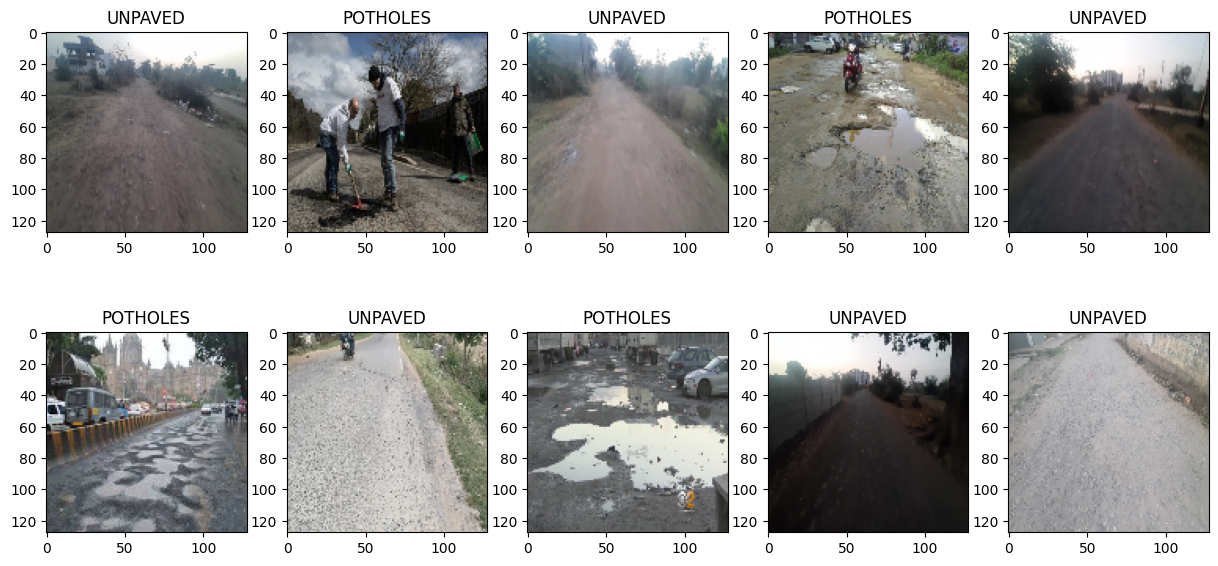

In [ ]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].set_title(y[l])
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_aspect('equal')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,3)
#print(Y)
X=np.array(X)
#X=X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

In [ ]:
# IMAGE_SIZE = [128, 128]
# Resnet = tf.keras.applications.Xception(include_top=False, input_shape=(128,128,3),pooling='avg')

# vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# for layer in vgg.layers:
#    layer.trainable=False

# model = keras.models.Sequential()
# model.add(Resnet)
# model.add(Flatten())
# model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
# model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
# model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
# model.add(Dense(3,activation='softmax'))

# x = Flatten()(vgg.output)
# # x = Dense(1000, activation='relu')(x)
# prediction = Dense(3, activation='softmax')(x)

# model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))

model.add(Dense(3, activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 128)     

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')
]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

history=model.fit(x_train, y_train, epochs=30, batch_size=12, verbose=2,validation_data=(x_test, y_test), callbacks =[earlystopping])

Epoch 1/30
158/158 - 5s - loss: 1.3353 - accuracy: 0.8190 - precision: 0.7544 - recall: 0.6778 - auc: 0.8664 - val_loss: 0.3221 - val_accuracy: 0.9132 - val_precision: 0.8795 - val_recall: 0.8571 - val_auc: 0.9747 - 5s/epoch - 29ms/step
Epoch 2/30
158/158 - 2s - loss: 0.3886 - accuracy: 0.8991 - precision: 0.8621 - recall: 0.8302 - auc: 0.9606 - val_loss: 0.2715 - val_accuracy: 0.9302 - val_precision: 0.9042 - val_recall: 0.8841 - val_auc: 0.9805 - 2s/epoch - 10ms/step
Epoch 3/30
158/158 - 2s - loss: 0.2876 - accuracy: 0.9245 - precision: 0.8943 - recall: 0.8772 - auc: 0.9765 - val_loss: 0.3604 - val_accuracy: 0.9000 - val_precision: 0.8609 - val_recall: 0.8349 - val_auc: 0.9642 - 2s/epoch - 11ms/step
Epoch 4/30
158/158 - 2s - loss: 0.2363 - accuracy: 0.9423 - precision: 0.9204 - recall: 0.9053 - auc: 0.9839 - val_loss: 0.2223 - val_accuracy: 0.9513 - val_precision: 0.9297 - val_recall: 0.9238 - val_auc: 0.9878 - 2s/epoch - 11ms/step
Epoch 5/30
158/158 - 2s - loss: 0.2599 - accuracy: 0

accuracy     : 97.25 %
val_accuracy : 96.56 %
loss         : 12.96 %
val_loss     : 16.10 %


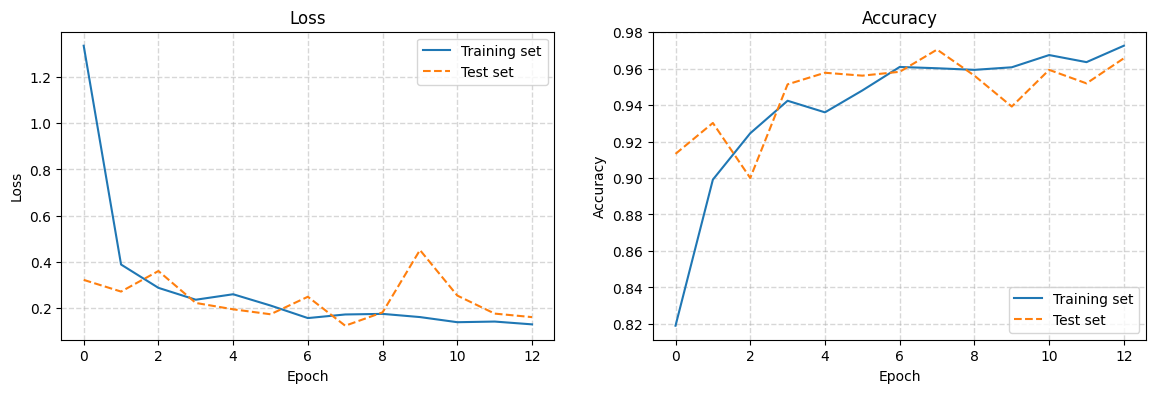

In [ ]:
def render_training_history(training_history):
    loss = history.history['loss']
    val_loss = training_history.history['val_loss']
    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']
    
    print("accuracy     : {:.2f} %".format(accuracy[-1]*100))
    print("val_accuracy : {:.2f} %".format(val_accuracy[-1]*100))
    print("loss         : {:.2f} %".format(loss[-1]*100))
    print("val_loss     : {:.2f} %".format(val_loss[-1]*100))
    
    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

render_training_history(history)

1/1 [==============================] - 0s 90ms/step
Prediction probabilites : [[5.9909022e-01 4.0090597e-01 3.8080648e-06]]
Probability percentage of classes : [59.909021854400635, 40.0905966758728, 0.0003808064775512321]
label_idx : 0
class : NORMAL


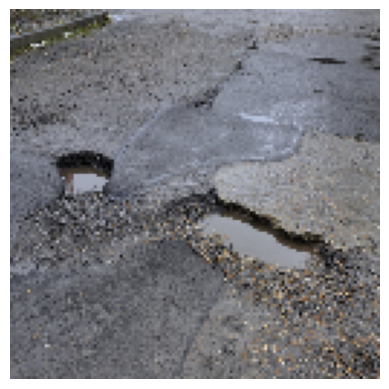

In [ ]:
def process_img(image_path):
  IMG_SIZE = 128
  img = cv2.imread(image_path,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
  img = np.array(img)
  plt.imshow(img[:,:,::-1])
  plt.axis("off")
  img = img.reshape(-1,128,128,3)
  return img


CATEGORIES = ['NORMAL','POTHOLED','UNPAVED']
model=load_model("model.h5")

image_path = 'hgfd.jpg'
preparedImage=process_img(image_path)

pred = model.predict([preparedImage])
label_idx = np.argmax(pred)
class_category = CATEGORIES[label_idx]

print(f"Prediction probabilites : {pred}")
print(f"Probability percentage of classes : {[float(x*100) for x in pred[0]]}")
print(f"label_idx : {label_idx}")
print(f"class : {class_category}")

In [ ]:
model.save("model.h5")

In [ ]:
model.save("model")
! zip -r models.zip ./model

In [ ]:
CATEGORIES = ['NORMAL','POTHOLED','UNPAVED']
model=load_model("model.h5")

def predict_video_class(video_path):
  IMG_SIZE = 128
  Q = deque(maxlen=128)
  # i=0
  label_idxs = []

  vidcap = cv2.VideoCapture(video_path)

  while True:
    success, frame = vidcap.read()
    if not success:
      break
      
    # ouput_frame = frame.copy()
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    frame = cv2.resize(frame, (IMG_SIZE,IMG_SIZE))
    frame = np.array(frame)
    frame = frame.reshape(-1,128,128,3)

    # make predictions on the frame and then update the predictions queue
    pred = model.predict([frame])
    Q.append(pred[0])

    # perform prediction averaging over the current history of previous predictions
    results = np.array(Q).mean(axis=0)
    label_idx = np.argmax(results)
    class_category = CATEGORIES[label_idx]
    label_idxs.append(label_idx)

    # i=i+1
    # cv2.putText(ouput_frame, f"frame {i}: {class_category}", (35, 50), cv2.FONT_HERSHEY_SIMPLEX,1.25, (0, 255, 0), 5)
    # cv2_imshow(ouput_frame)
    # cv2.waitKey(1)
    
  cv2.destroyAllWindows()
  vidcap.release()

video_path = "pothole_video.mp4"
label_idxs = predict_video_class(video_path)
idx = st.mode(label_idxs)
class_category = CATEGORIES[idx]
print(f"Video is of {class_category} road")

In [ ]:
def make_frames_from_video(video_path):
  IMG_SIZE = 128
  vidcap = cv2.VideoCapture(video_path)
  video_frames = []

  while True:
    success, frame = vidcap.read()
    if not success:
      break
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    frame = cv2.resize(frame, (IMG_SIZE,IMG_SIZE))
    video_frames.append(frame)
    return video_frames

  cv2.destroyAllWindows()
  vidcap.release()


CATEGORIES = ['NORMAL','POTHOLED','UNPAVED']
model=load_model("model.h5")

video_path = "pothole_video.mp4"
video_frames = make_frames_from_video(video_path)

video_frames = np.array(video_frames)
video_frames = video_frames.reshape(-1,128,128,3)
preds = model.predict(video_frames)

label_idxs = np.argmax(preds, axis=1)
idx = st.mode(label_idxs)
class_category = CATEGORIES[idx]

print(f"Video is of {class_category} road")

In [ ]:
# def video_to_frames(video, path_output_dir):
#     # extract frames from a video and save to directory as 'x.png' where 
#     # x is the frame index
#     vidcap = cv2.VideoCapture(video)
#     count = 0
#     while vidcap.isOpened():
#         success, image = vidcap.read()
#         if success:
#             cv2.imwrite(os.path.join(path_output_dir, '%d.png') % count, image)
#             count += 1
#         else:
#             break
#     cv2.destroyAllWindows()
#     vidcap.release()

# video_to_frames('../somepath/myvid.mp4', '../somepath/out')